## Example H SAF SM NRT products

In this Example we will read and plot images of the H SAF NRT products H08, H14 and H16 using the test images included in the ascat package.

In [1]:
import os
from datetime import datetime
import numpy as np
import cartopy
import matplotlib.pyplot as plt
from pytesmo.grid.resample import resample_to_grid
%matplotlib inline

from ascat.h_saf import H08BufrFileList
from ascat.h_saf import H14GribFileList
from ascat.h_saf import AscatNrtBufrFileList

/home/shahn/conda/ascat_conda/envs/ascat_env/lib/python3.6/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")
/home/shahn/conda/ascat_conda/envs/ascat_env/lib/python3.6/site-packages/pytesmo/grid/resample.py:30: UserWarning: resampling functions have moved to the repurpose package and will beremoved from pytesmo soon!
  warn("resampling functions have moved to the repurpose package and will be"


In [2]:
test_data_path = os.path.join('..', 'tests','ascat_test_data', 'hsaf')

### Disaggregated ASCAT SSM NRT (H08)

H08 data has a much higher resolution and comes on a 0.00416 degree grid. The sample data included in the ascat package was observed on the same time as the included H16 product.

In [3]:
h08_path = os.path.join(test_data_path, 'h08')
h08_nrt = H08BufrFileList(h08_path)
h08_data = h08_nrt.read(datetime(2010, 5, 1, 8, 33, 1))
h08_data

{'ssm': array([[1.69999998e+38, 1.69999998e+38, 1.69999998e+38, ...,
         1.69999998e+38, 1.69999998e+38, 1.69999998e+38],
        [1.69999998e+38, 1.69999998e+38, 1.69999998e+38, ...,
         1.69999998e+38, 1.69999998e+38, 1.69999998e+38],
        [1.69999998e+38, 1.69999998e+38, 1.69999998e+38, ...,
         1.69999998e+38, 1.69999998e+38, 1.69999998e+38],
        ...,
        [1.69999998e+38, 1.69999998e+38, 1.69999998e+38, ...,
         1.69999998e+38, 1.69999998e+38, 1.69999998e+38],
        [1.69999998e+38, 1.69999998e+38, 1.69999998e+38, ...,
         1.69999998e+38, 1.69999998e+38, 1.69999998e+38],
        [1.69999998e+38, 1.69999998e+38, 1.69999998e+38, ...,
         1.69999998e+38, 1.69999998e+38, 1.69999998e+38]]),
 'ssm_noise': array([[1.69999998e+38, 1.69999998e+38, 1.69999998e+38, ...,
         1.69999998e+38, 1.69999998e+38, 1.69999998e+38],
        [1.69999998e+38, 1.69999998e+38, 1.69999998e+38, ...,
         1.69999998e+38, 1.69999998e+38, 1.69999998e+38],
     

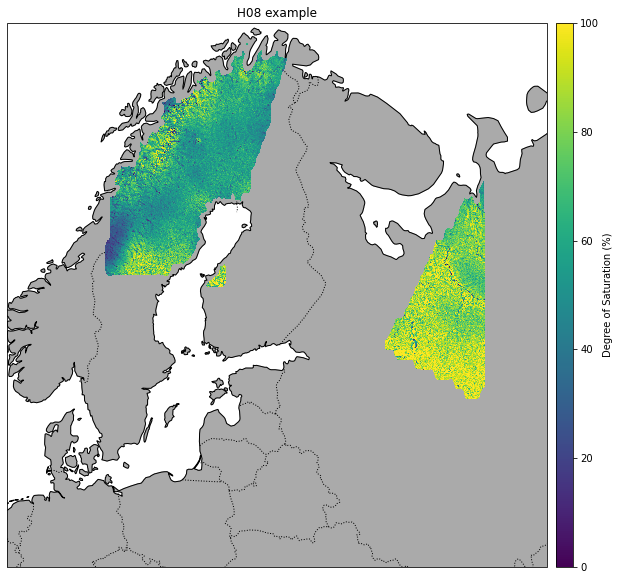

In [4]:
plot_crs = cartopy.crs.Mercator()
data_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1, projection=plot_crs)
ax.set_title('H08 example')

ax.add_feature(cartopy.feature.COASTLINE, linestyle='-')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAND, facecolor='#aaaaaa')
ax.set_extent([5, 50, 50, 70])

ssm = np.ma.masked_greater(np.flipud(h08_data['ssm']), 100)
sc = ax.pcolormesh(h08_data['lon'], np.flipud(h08_data['lat']), ssm, zorder=3, 
                   transform=data_crs, vmin=0, vmax=100)

cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0,
                    0.02, ax.get_position().height])

cbar = fig.colorbar(sc, ax=ax, cax=cax)
cbar.set_label('Degree of Saturation (%)')

### SM-DAS-2 (H14)

The SM-DAS-2 (H14) product is a global product on a reduced gaussian grid with a resolution of approx. 25km.

In [5]:
h14_path = os.path.join(test_data_path, 'h14')
h14_nrt = H14GribFileList(h14_path)
h14_data = h14_nrt.read(datetime(2014, 5, 15))

# the data is a dictionary, each dictionary key contains the array of one variable
print("The following variables are in this image", h14_data.keys())
print(h14_data['SM_layer1_0-7cm'].shape)
print(h14_data['lon'].shape, h14_data['lat'].shape)

The following variables are in this image dict_keys(['SM_layer1_0-7cm', 'lat', 'lon', 'SM_layer2_7-28cm', 'SM_layer3_28-100cm', 'SM_layer4_100-289cm'])
(800, 1600)
(800, 1600) (800, 1600)


Let's plot all layers in the H14 product

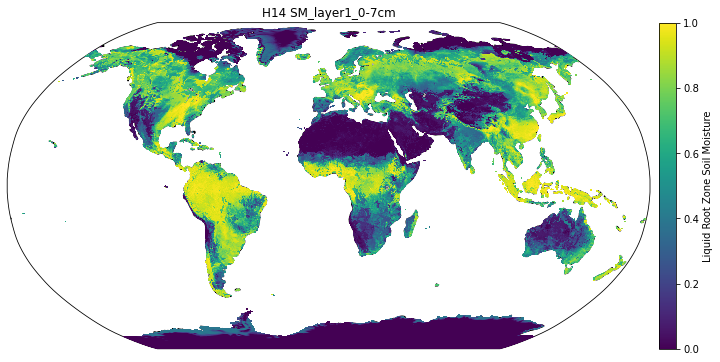

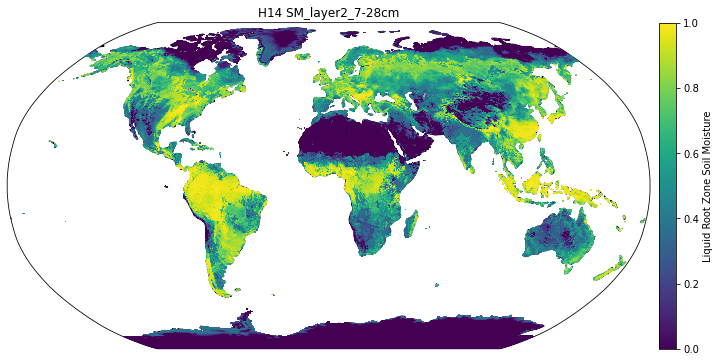

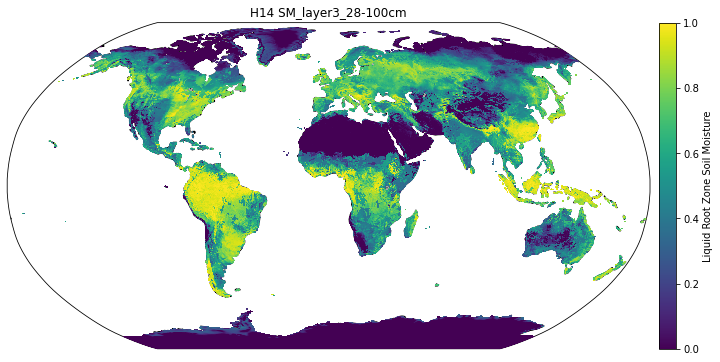

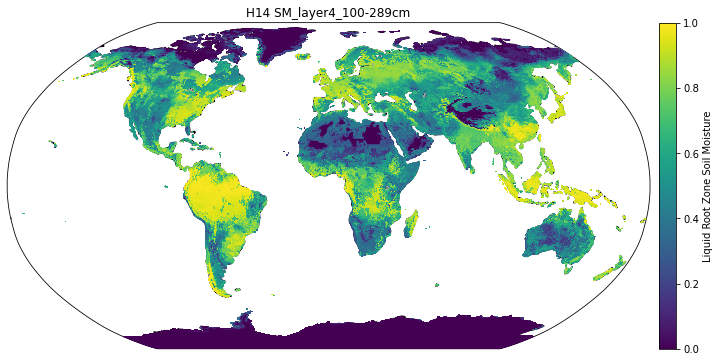

In [6]:
plot_crs = cartopy.crs.Robinson()
data_crs = cartopy.crs.PlateCarree()

layers = ['SM_layer1_0-7cm', 'SM_layer2_7-28cm', 
          'SM_layer3_28-100cm', 'SM_layer4_100-289cm']

for layer in layers:
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 1, 1, projection=plot_crs)
    ax.set_title('H14 {:}'.format(layer))

    ax.add_feature(cartopy.feature.COASTLINE, linestyle='-')
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.add_feature(cartopy.feature.LAND, facecolor='#aaaaaa')

    sc = ax.pcolormesh(h14_data['lon'], h14_data['lat'], h14_data[layer], zorder=3, 
                       transform=data_crs)

    cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0,
                    0.02, ax.get_position().height])

    cbar = fig.colorbar(sc, ax=ax, cax=cax)
    cbar.set_label('Liquid Root Zone Soil Moisture')

### ASCAT SSM NRT (H16, H101, H102, H103)

The products H16, H101, H102, H103 come in the same BUFR format and the default filenames are slightly different.

In [7]:
h16_path = os.path.join(test_data_path, 'h16')
h16_nrt = AscatNrtBufrFileList(h16_path)
h16_data = h16_nrt.read(datetime(2017, 2, 20, 11, 15, 0))

print(h16_data['sm'].shape, h16_data['lon'].shape, h16_data['lat'].shape)

(2016,) (2016,) (2016,)


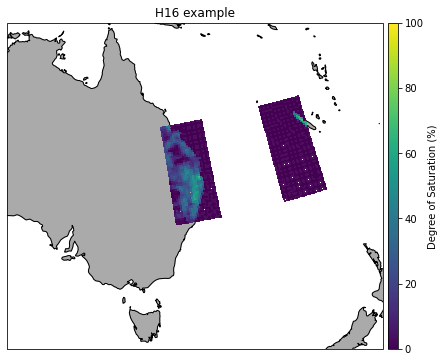

In [8]:
plot_crs = cartopy.crs.Mercator()
data_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1, projection=plot_crs)
ax.set_title('H16 example')

ax.add_feature(cartopy.feature.COASTLINE, linestyle='-')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAND, facecolor='#aaaaaa')
ax.set_extent([130, 175, -10, -42])

sc = ax.scatter(h16_data['lon'], h16_data['lat'], 
                c=h16_data['sm'], zorder=3, marker='s', s=2,
                transform=data_crs, vmin=0, vmax=100)

cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0,
                    0.02, ax.get_position().height])
cbar = fig.colorbar(sc, ax=ax, cax=cax)
cbar.set_label('Degree of Saturation (%)')

Or resample orbit geometry to a regular 0.1 deg x 0.1 deg grid for plotting

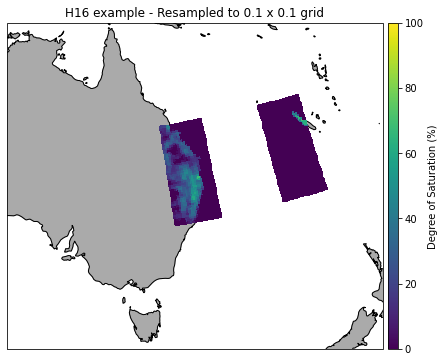

In [9]:
# lets resample to a 0.1 degree grid
# define the grid points in latitude and logitude
lats_dim = np.arange(-80, 80, 0.1)
lons_dim = np.arange(-160, 170, 0.1)

# make 2d grid out the 1D grid spacings
lons_grid, lats_grid = np.meshgrid(lons_dim, lats_dim)
    
resampled_data = resample_to_grid({'sm': h16_data['sm']}, h16_data['lon'], 
                                  h16_data['lat'], lons_grid, lats_grid)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1, projection=plot_crs)
ax.set_title('H16 example - Resampled to 0.1 x 0.1 grid')

ax.add_feature(cartopy.feature.COASTLINE, linestyle='-')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAND, facecolor='#aaaaaa')
ax.set_extent([130, 175, -10, -42])

sc = ax.pcolormesh(lons_grid, lats_grid, resampled_data['sm'], zorder=3, 
                   vmin=0, vmax=100, transform=data_crs)

cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0,
                    0.02, ax.get_position().height])
cbar = fig.colorbar(sc, ax=ax, cax=cax)
cbar.set_label('Degree of Saturation (%)')